In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('results.csv', names = ['year', 'LA', 'global'], skiprows=1 )
data.head()

,year,LA,global
0,1849,15.71,7.98
1,1850,15.28,7.90
2,1851,15.53,8.18
3,1852,15.61,8.10
4,1853,16.27,8.04


In [3]:
data['LA_ma5_temp'] = data['LA'].rolling(window=5).mean()
data['global_ma5_temp'] = data['global'].rolling(window=5).mean()
data.head(10)

,year,LA,global,LA_ma5_temp,global_ma5_temp
0,1849,15.71,7.98,NaN,NaN
1,1850,15.28,7.90,NaN,NaN
2,1851,15.53,8.18,NaN,NaN
3,1852,15.61,8.10,NaN,NaN
4,1853,16.27,8.04,15.680,8.040
5,1854,15.74,8.21,15.686,8.086
6,1855,15.94,8.11,15.818,8.128
7,1856,15.52,8.00,15.816,8.092
8,1857,16.19,7.76,15.932,8.024
9,1858,15.67,8.10,15.812,8.036


In [4]:
data = data.iloc[4:, ]

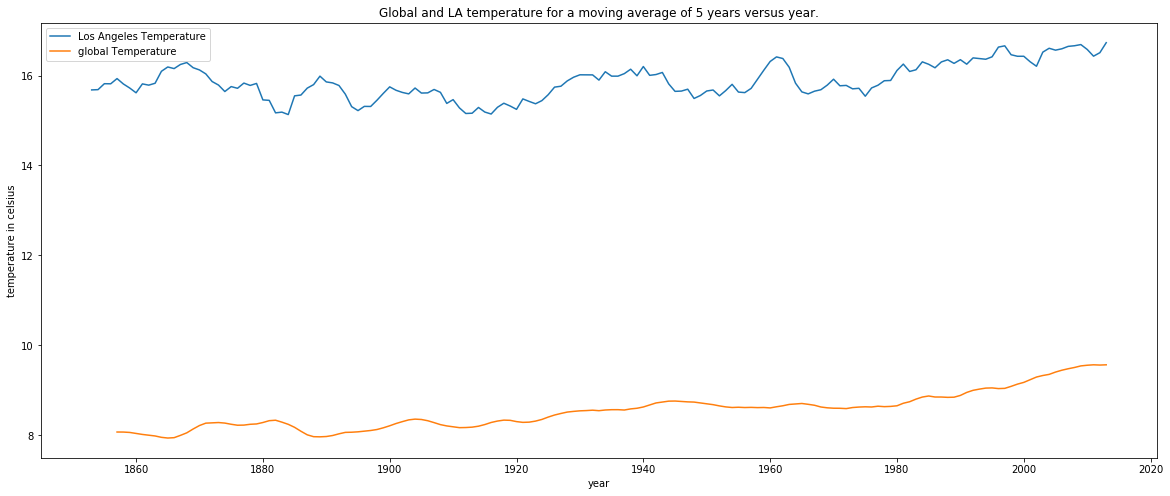

In [5]:
plt.figure(figsize=(20, 8))
plt.plot(data['year'], data['LA_ma5_temp'], label='Los Angeles Temperature')
plt.plot(data['year'], data['global_ma5_temp'].rolling(window=5).mean(), label='global Temperature')
plt.xlabel('year')
plt.ylabel('temperature in celsius')
plt.title('Global and LA temperature for a moving average of 5 years versus year.')
plt.legend()
plt.show();

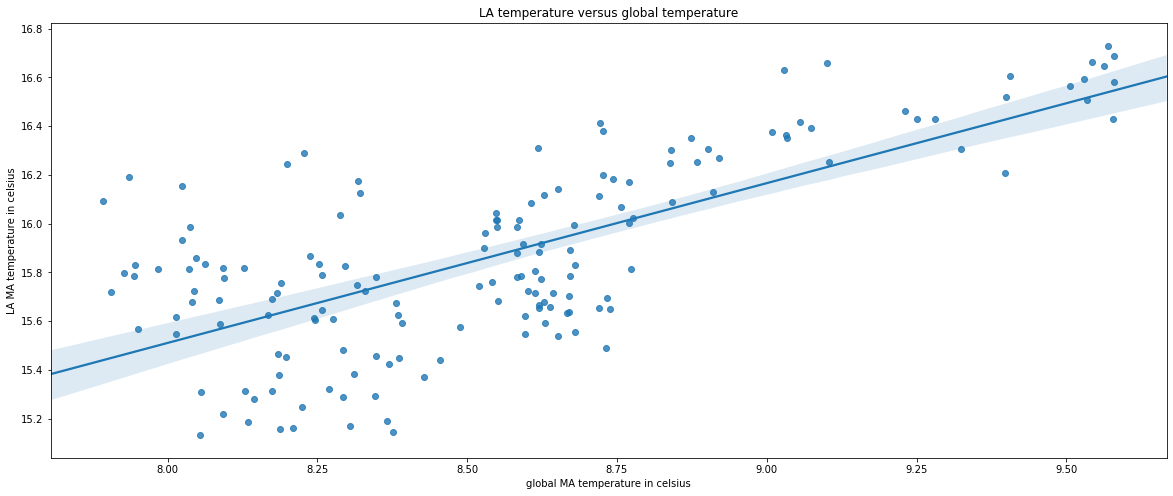

In [6]:
plt.figure(figsize=(20, 8))
ax = sns.regplot(x="global_ma5_temp", y="LA_ma5_temp", data=data)
ax.set(xlabel='global MA temperature in celsius', ylabel='LA MA temperature in celsius', title = 'LA temperature versus global temperature');

In [7]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(data['global_ma5_temp'].values, data['LA_ma5_temp'].values)

In [8]:
pearson_coef

0.7093750818103

In [9]:
np.polyfit(data['global_ma5_temp'].values, data['LA_ma5_temp'].values, 1)

array([ 0.65570147, 10.2644381 ])